In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.model_selection import train_test_split
x,y=make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import Lasso


In [9]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pre=lr.predict(x_test)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pre)

0.6186926408914154

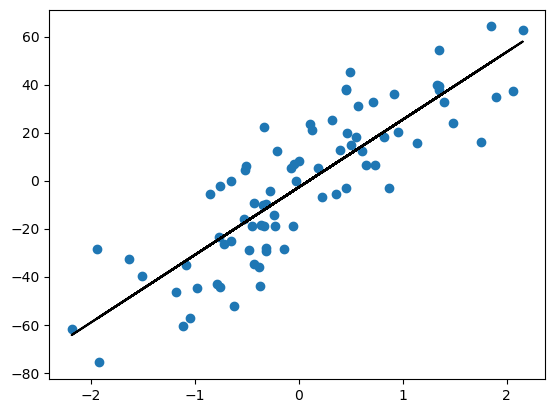

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='black')

In [14]:
from sklearn.linear_model import Lasso,Ridge

C:\Users\raj\AppData\Local\Temp\ipykernel_508\25690825.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(x_train,y_train)
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+04, tolerance: 7.701e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


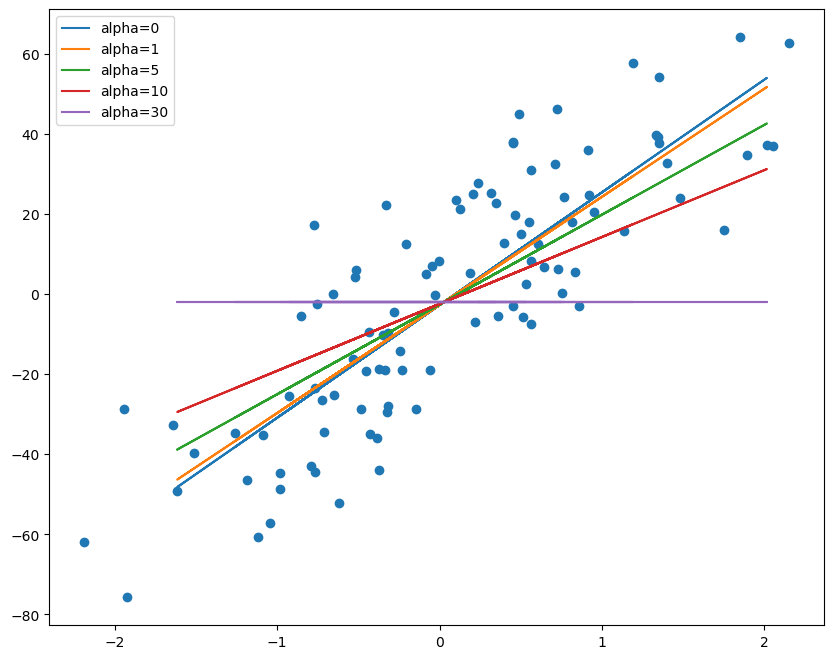

In [20]:
alphas = [0,1,5,10,30]
r2=[]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(x_train,y_train)
    y_per=L.predict(x_test)
    k=r2_score(y_per,y_test)
    r2.append(k)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

In [21]:
r2

[0.47933365904951497,
 0.4377277007117417,
 0.1510174909973765,
 -0.8242092740360618,
 -4.758825034905361e+33]

In [29]:
L = Lasso(alpha=0.000001)
L.fit(x_train,y_train)
y_per=L.predict(x_test)
r2_score(y_per,y_test)

0.47933362160571347

In [31]:
r=Ridge(alpha=0.5)
r.fit(x_train,y_train)
y_per=r.predict(x_test)
r2_score(y_per,y_test)

0.47266913816916933

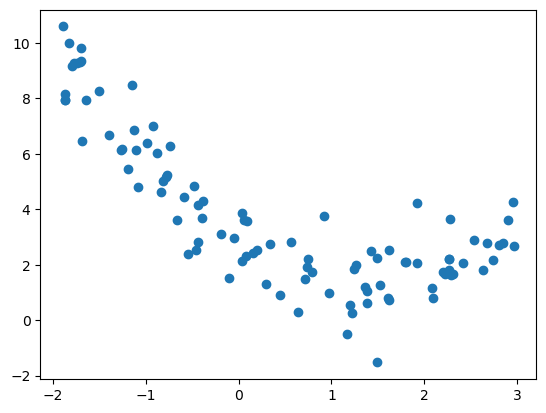

In [33]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)
plt.scatter(x1,x2)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [42]:
pf = PolynomialFeatures(degree=2)
x1_tr=pf.fit_transform(x1)
x2_tr=pf.fit_transform(x2)

In [43]:
lr.fit(x1_tr,x2_tr)

LinearRegression()

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.442e+01, tolerance: 7.408e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_c

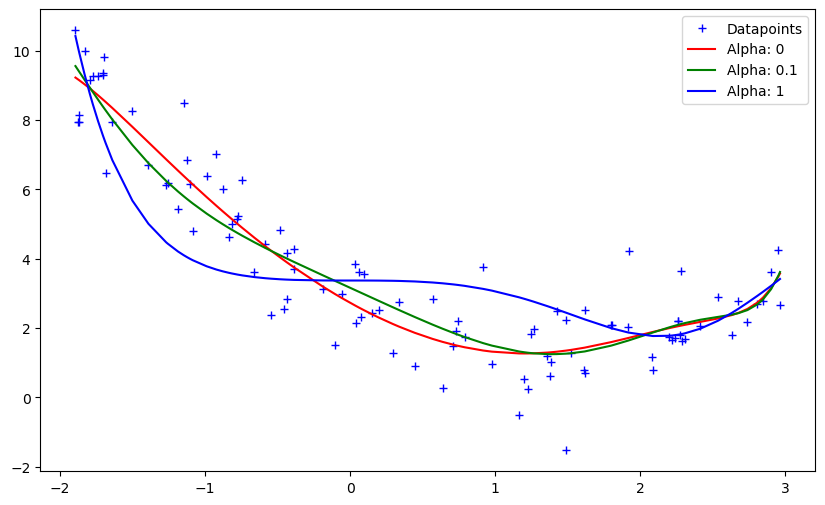

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()